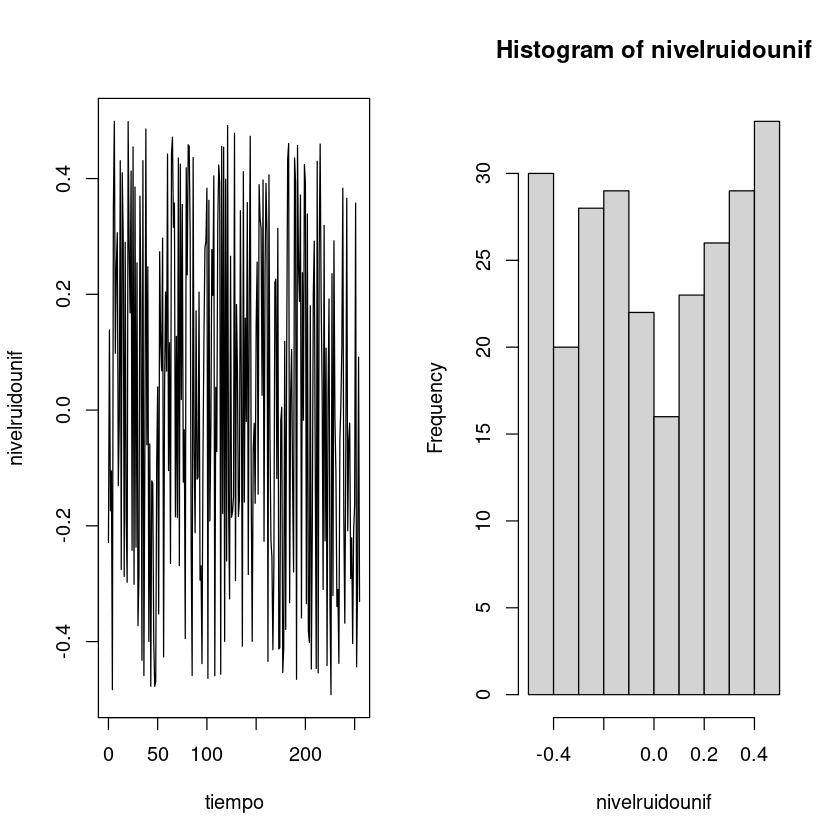

In [3]:
N = 256
tiempo = 0:(N-1)

ciclos = 2
amplitud = 1
seno2 = amplitud*sin( ciclos*2*pi*tiempo/N)
nivelruidounif = runif(N, min=-0.5, max=0.5)

op <- par(mfrow = c(1, 2))
plot(tiempo, nivelruidounif, type='l')
hist(nivelruidounif)

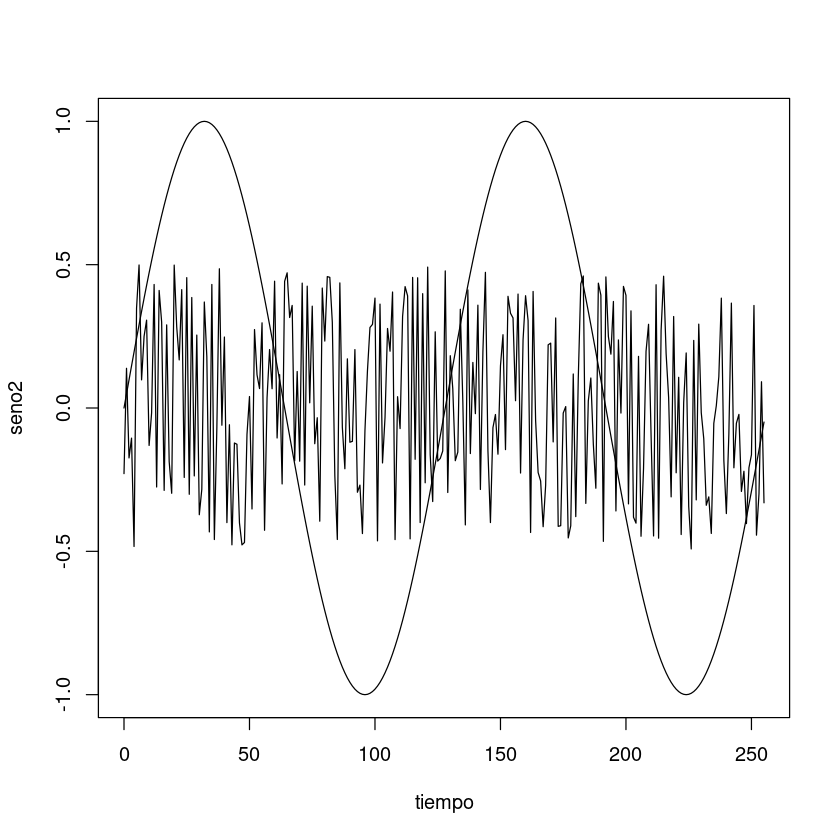

In [4]:
op <- par(mfrow = c(1, 1))
plot(tiempo, seno2, type='l')
lines(tiempo, nivelruidounif)

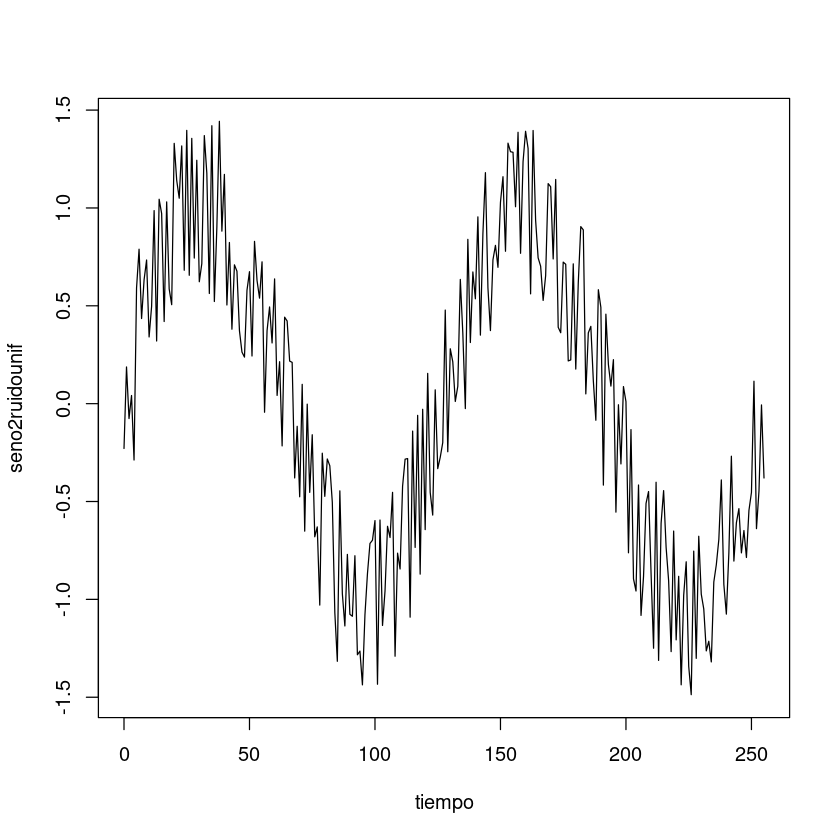

In [9]:
seno2ruidounif = seno2 + nivelruidounif
plot(tiempo, seno2ruidounif, type='l')

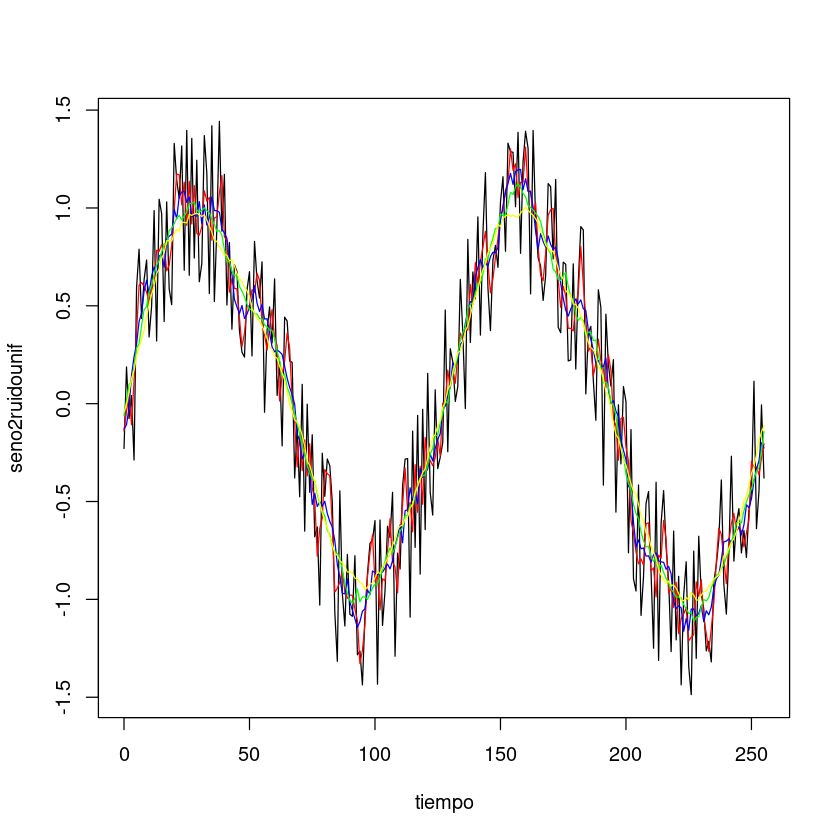

In [11]:
plot(tiempo, seno2ruidounif, type='l')

seno2ruidounif.MA3 =
filter(seno2ruidounif, rep(1/3,3) , circular=TRUE)
lines(tiempo, seno2ruidounif.MA3, col='red')

seno2ruidounif.MA7 =
filter(seno2ruidounif, rep(1/7,7) , circular=TRUE)
lines(tiempo, seno2ruidounif.MA7,col='blue')

seno2ruidounif.MA15 =
filter(seno2ruidounif , rep(1/15,15), circular=TRUE)
lines(tiempo, seno2ruidounif.MA15,col='green')

seno2ruidounif.MA25 =
filter(seno2ruidounif, rep(1/25,25), circular=TRUE)
lines(tiempo, seno2ruidounif.MA25, col='yellow')

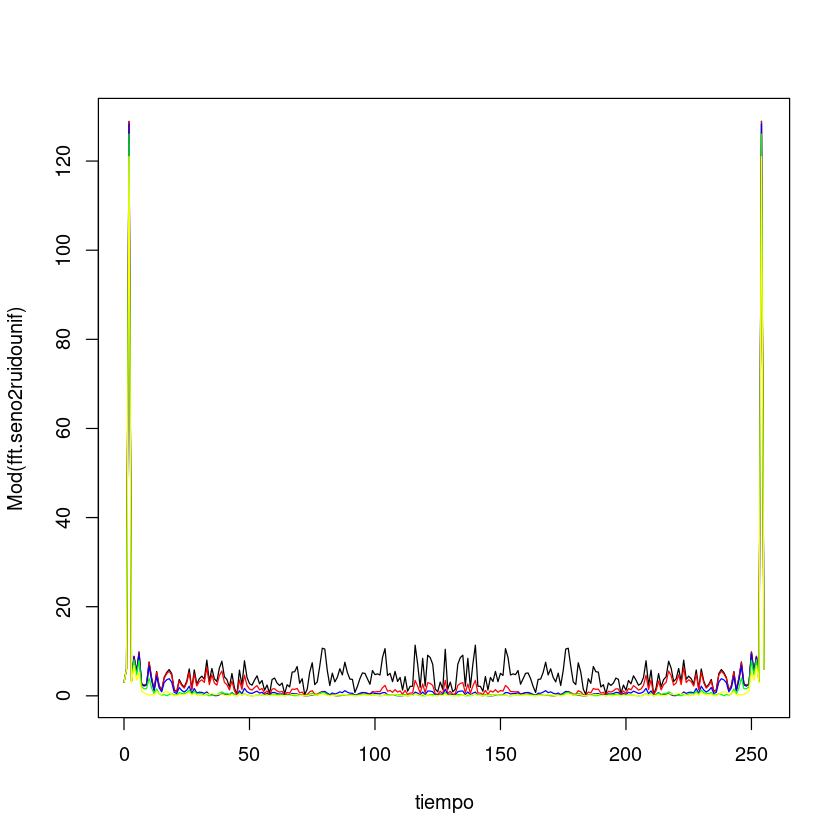

In [13]:
fft.seno2ruidounif = fft(seno2ruidounif)
fft.seno2ruidounif.MA3 = fft(seno2ruidounif.MA3)
fft.seno2ruidounif.MA7 = fft(seno2ruidounif.MA7)
fft.seno2ruidounif.MA15 = fft(seno2ruidounif.MA15)
fft.seno2ruidounif.MA25 = fft(seno2ruidounif.MA25)

plot(tiempo,Mod(fft.seno2ruidounif), type='l')
lines(tiempo,Mod(fft.seno2ruidounif.MA3), col='red')
lines(tiempo,Mod(fft.seno2ruidounif.MA7), col='blue')
lines(tiempo,Mod(fft.seno2ruidounif.MA15), col='green')
lines(tiempo,Mod(fft.seno2ruidounif.MA25), col='yellow')

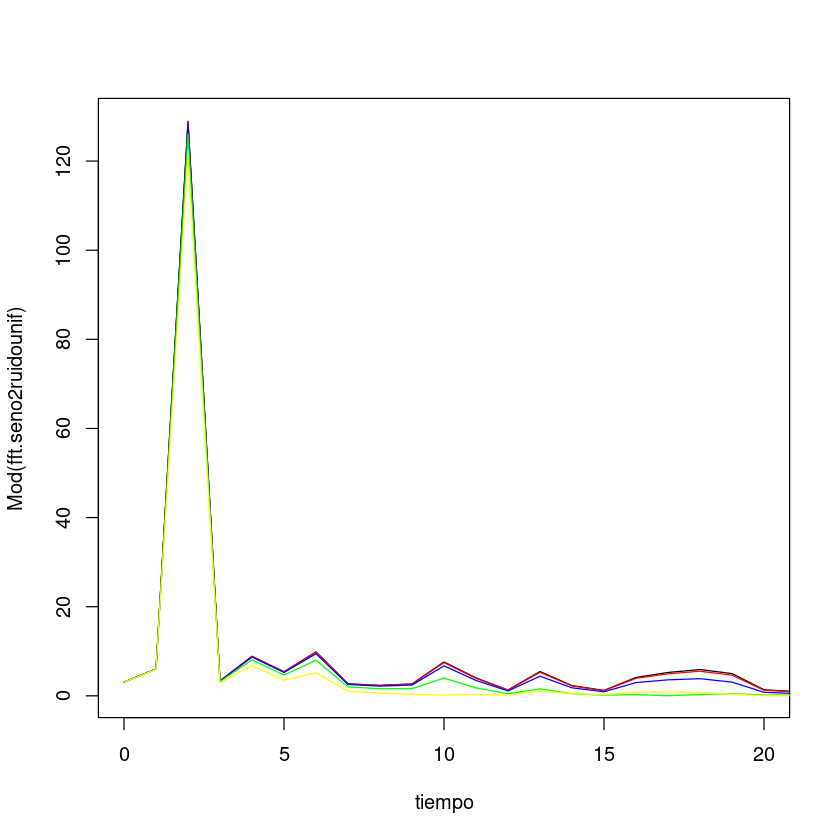

In [14]:
plot(tiempo,Mod(fft.seno2ruidounif ), type='l', xlim=c(0,20))
lines(tiempo,Mod(fft.seno2ruidounif.MA3), col='red')
lines(tiempo,Mod(fft.seno2ruidounif.MA7), col='blue')
lines(tiempo,Mod(fft.seno2ruidounif.MA15), col='green')
lines(tiempo,Mod(fft.seno2ruidounif.MA25), col='yellow')

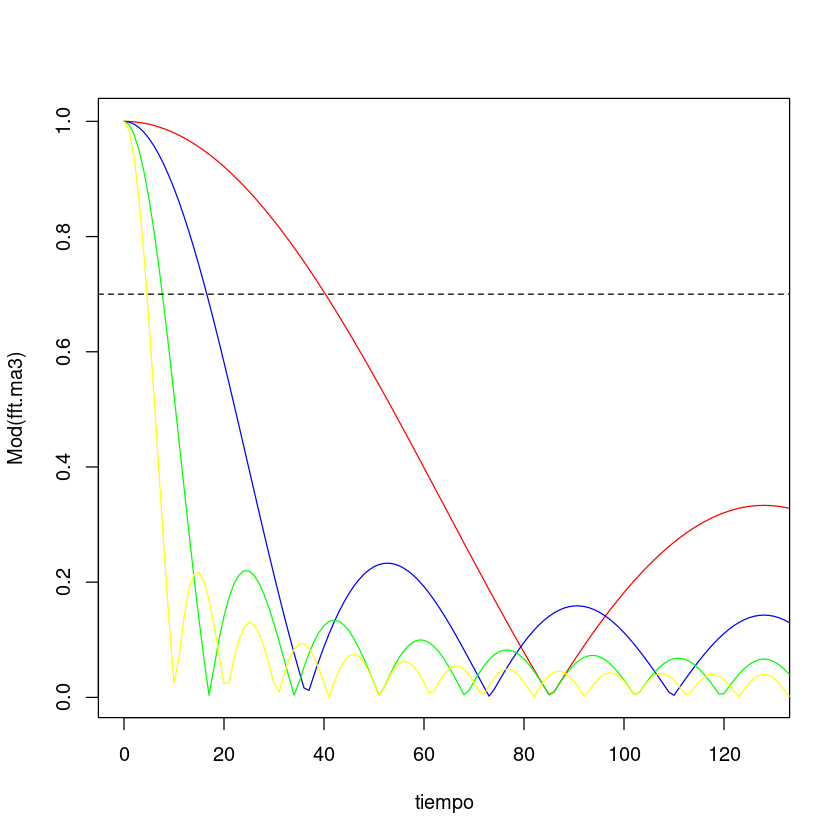

In [15]:
ma3 = rep(0,N)
ma3[1:3] = 1/3
ma7 = rep(0,N)
ma7[1:7] = 1/7
ma15 = rep(0,N)
ma15[1:15] = 1/15
ma25 = rep(0,N)
ma25[1:25] = 1/25

fft.ma3 = fft(ma3)
fft.ma7 = fft(ma7)
fft.ma15 = fft(ma15)
fft.ma25 = fft(ma25)
plot(tiempo, Mod(fft.ma3), type='l', col='red', xlim=c(0,N/2))
lines(tiempo, Mod(fft.ma7), col='blue')
lines(tiempo, Mod(fft.ma15), col='green')
lines(tiempo, Mod(fft.ma25), col='yellow')
abline(h=0.7, lty=2)

[1] "X"  "t"  "a0" "a1" "a2" "rn" "a" 


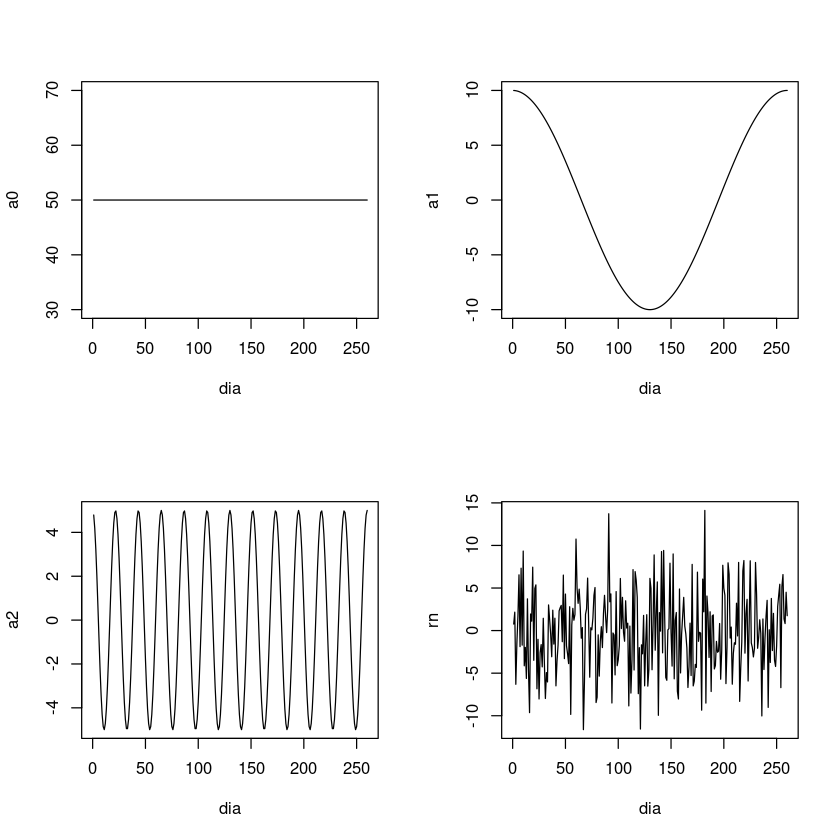

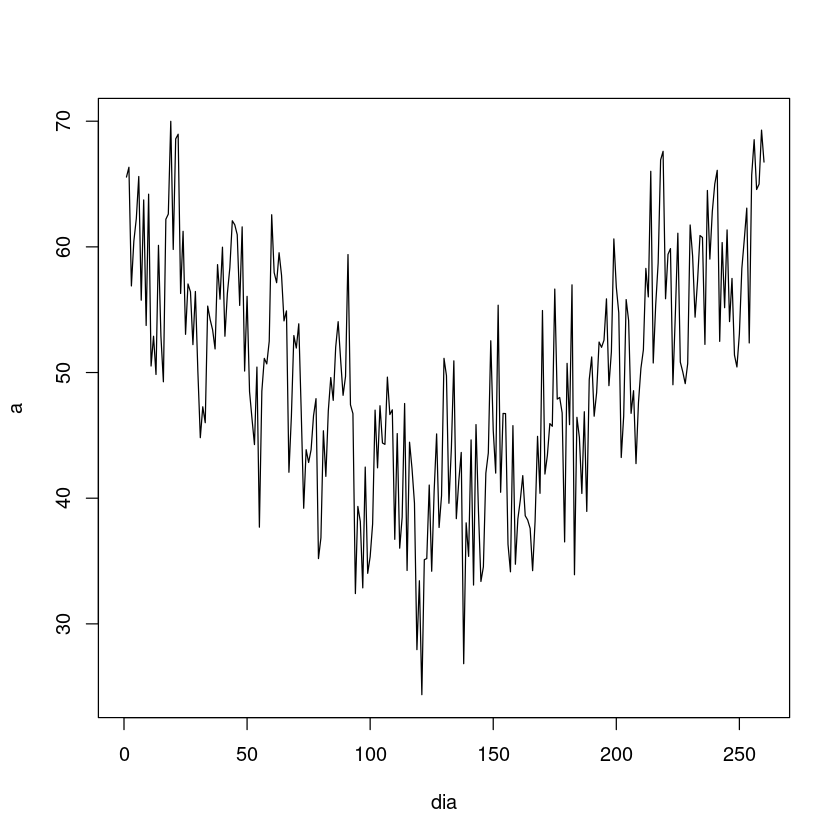

In [3]:
dir = '/home/marcelo/Dropbox/Series_Temporales_2022/'
dato = read.csv(paste(dir, 'TS_1.csv', sep=''))
print(names(dato))
# [1] "X" "t" "a0" "a1" "a2" "rn" "a"

op <- par(mfrow = c(2, 2))
plot(dato$t,dato$a0,type='l', xlim=c(0,260), xlab='dia' , ylab='a0')
plot(dato$t,dato$a1,type='l', xlim=c(0,260), xlab='dia' , ylab='a1')
plot(dato$t,dato$a2,type='l', xlim=c(0,260), xlab='dia' , ylab='a2')
plot(dato$t,dato$rn,type='l', xlim=c(0,260), xlab='dia' , ylab='rn')

op <- par(mfrow = c(1, 1))
plot(dato$t, dato$a, type='l', xlim=c(0,260), xlab='dia', ylab='a')

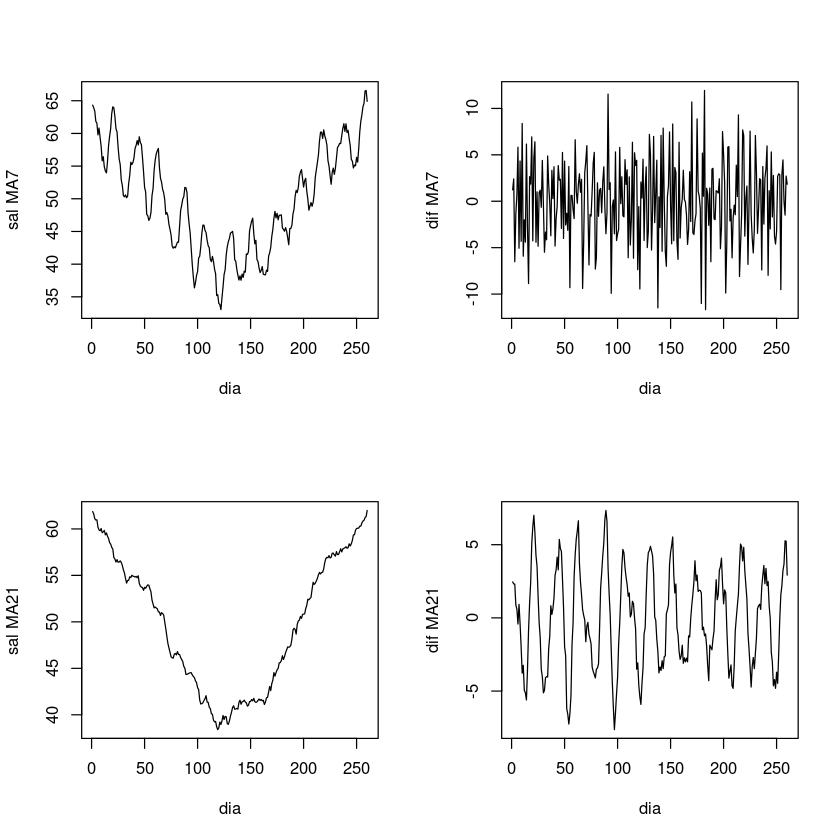

In [4]:
outMA7 <- filter(dato$a, rep(1/7,7), circular =TRUE)
difMA7 <- dato$a - outMA7
outMA21 <- filter(dato$a, rep(1/21,21), circular =TRUE)
difMA21 <- outMA7 - outMA21

op <- par(mfrow = c(2, 2))
plot(dato$t, outMA7, type='l', xlab='dia', ylab='sal MA7')
plot(dato$t, difMA7, type='l' , xlab='dia', ylab='dif MA7')
plot(dato$t, outMA21, type='l', xlab='dia', ylab='sal MA21')
plot(dato$t, difMA21, type='l', xlab='dia', ylab='dif MA21')

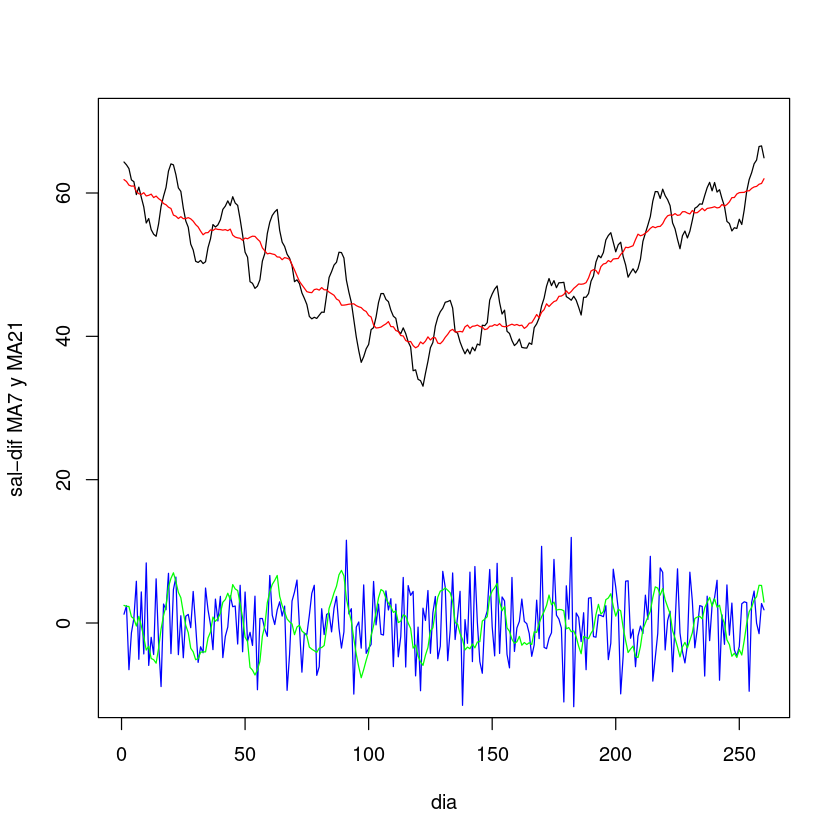

In [7]:
op <- par(mfrow = c(1, 1))
plot(dato$t,outMA7, type='l', ylim=c(-10,70), xlab='dia', ylab='sal−dif MA7 y MA21', col='black')
lines(dato$t,difMA7, col='blue')
lines(dato$t,outMA21, col='red')
lines(dato$t,difMA21, col='green')

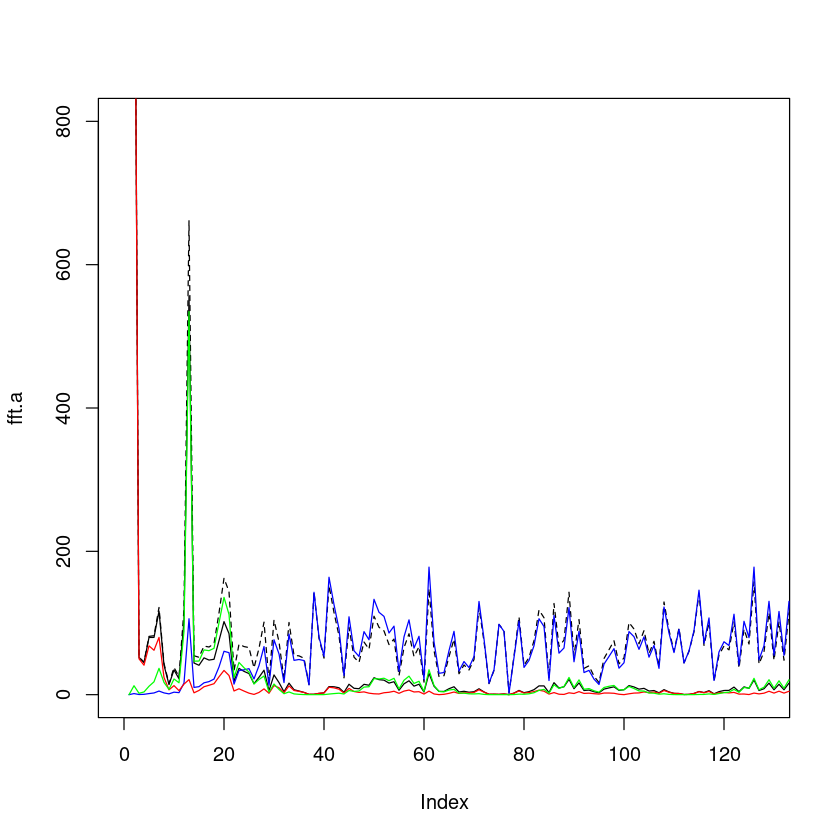

In [8]:
fft.a = Mod(fft(dato$a))
fft.outMA7 = Mod(fft(outMA7))
fft.difMA7 = Mod(fft(difMA7))
fft.outMA21 = Mod(fft(outMA21))
fft.difMA21 = Mod(fft(difMA21))

op <- par(mfrow = c(1, 1))
plot( fft.a, type='l', col='black', ylim=c(0,800), xlim=c(0,128), lty=2)
lines( fft.outMA7, col='black')
lines( fft.difMA7, col='blue')
lines( fft.outMA21, col='red')
lines( fft.difMA21, col='green')